<a href="https://colab.research.google.com/github/nisha1365/Python-basics/blob/main/01_2_EDA_Pandas_EXERCISE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Python for Data Science & Analysis 
## Notes 3.1, Exploratory Data Analysis & Visualization

## Objectives
* describe a standard EDA workflow
* EXTRA: describe a standard communication & reporting process
* write a program which uses pandas to:
    * obtain a subset of columns using list indexes
    * obtain a subset of rows using locator syntax  
    * obtain descriptive statistics 
    * applies a test to a column to discretize it
    * factor a continuous column with a discrete column
* write a program which uses seaborn and matplotlib to:
    * show univariate plots (eg., distplot)
    * show multivariate plots (eg., scatterplot)
    * EXTRA: customize plots

# Part 1: What is EDA?

## What is Exploratory Data Analysis?

* goal:
    * investigate
    * explain
    * describe
    * understand

* questions?
    * is there enough data?
    * is the data correct?
    * what is the distribution of each column?
    * how do the columns correlate?

* method
    * visual
    * primarily descriptive

## What are the tools for EDA in Python?

Simple pair: Pandas for data exploration, seaborn for visualization.


...but lots of options. 

## What are the challenges around EDA?

### Challenges of EDA:

* Strategic 
* Organizational
* Technical 

# Part 2: EDA with Pandas

In [1]:
import pandas as pd

df = pd.read_csv('/content/titanic.csv')


In [2]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [5]:
df.tail()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
886,0,2,male,27.0,0,0,13.00,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.00,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.45,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.00,C,First,man,True,C,Cherbourg,yes,True
890,0,3,male,32.0,0,0,7.75,Q,Third,man,True,NaN,Queenstown,no,True


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [4]:
df.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


survived       0.383838
pclass         2.308642
age           29.699118
sibsp          0.523008
parch          0.381594
fare          32.204208
adult_male     0.602694
alone          0.602694
dtype: float64

In [13]:
df['sex'].unique()

array(['male', 'female'], dtype=object)

In [14]:
df['pclass'].unique()

array([3, 1, 2])

In [15]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [16]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [17]:
df['class'].unique()

array(['Third', 'First', 'Second'], dtype=object)

In [26]:
df['survived'].value_counts()

0    549
1    342
Name: survived, dtype: int64

In [27]:
df['sex'].value_counts()

male      577
female    314
Name: sex, dtype: int64

In [28]:
df['embarked'].value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

In [29]:
df['embark_town'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Name: embark_town, dtype: int64

In [30]:
df['class'].value_counts()

Third     491
First     216
Second    184
Name: class, dtype: int64

In [32]:
df['alone'].value_counts()

True     537
False    354
Name: alone, dtype: int64

In [20]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [23]:
df.corr()

,survived,pclass,age,sibsp,parch,fare,adult_male,alone
survived,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,0.094035,0.135207
age,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.280328,0.198270
sibsp,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,-0.557080,0.094035,0.280328,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,-0.203367,0.135207,0.198270,-0.584471,-0.583398,-0.271832,0.404744,1.000000


In [24]:
df.median()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


survived       0.0000
pclass         3.0000
age           28.0000
sibsp          0.0000
parch          0.0000
fare          14.4542
adult_male     1.0000
alone          1.0000
dtype: float64

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

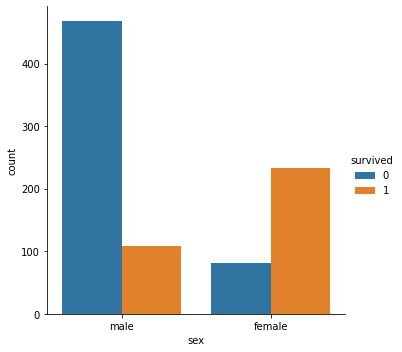

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
 
# Countplot
sns.catplot(x ="sex", hue ="survived",
kind ="count", data = df)

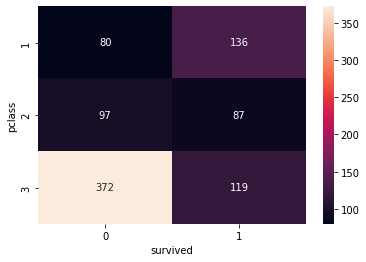

In [39]:
 #GROUP BY
group = df.groupby(['pclass', 'survived'])
pclass_survived = group.size().unstack()
 
# Heatmap - Color encoded 2D representation of data.
sns.heatmap(pclass_survived, annot = True, fmt ="d")

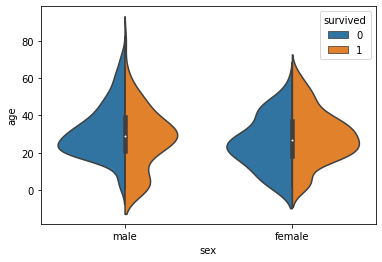

In [40]:
sns.violinplot(x ="sex", y ="age", hue ="survived",
data = df, split = True)

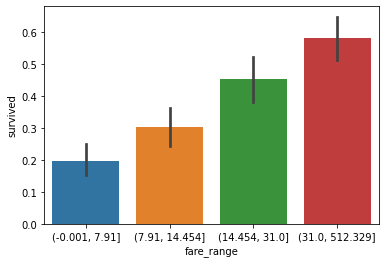

In [41]:
# Divide Fare into 4 bins
df['fare_range'] = pd.qcut(df['fare'], 4)
 
# Barplot - Shows approximate values based
# on the height of bars.
sns.barplot(x ='fare_range', y ='survived',
data = df)

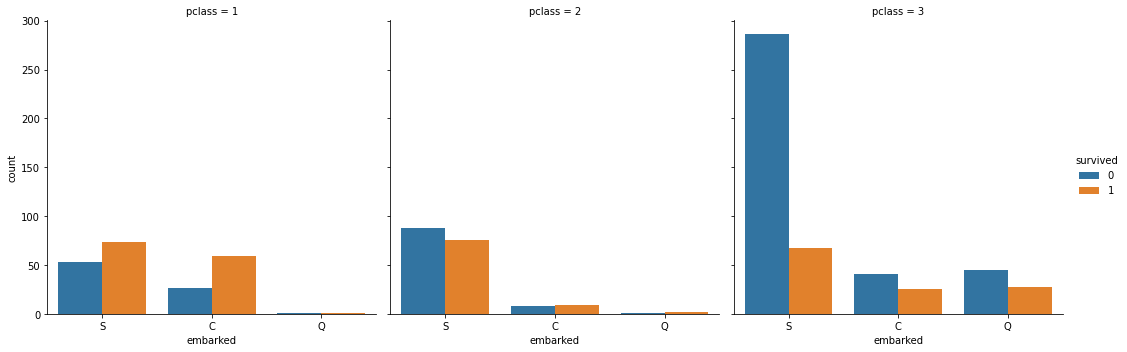

In [43]:
sns.catplot(x ='embarked', hue ='survived',
kind ='count', col ='pclass', data = df)

Text(0, 0.5, 'Probability Density')

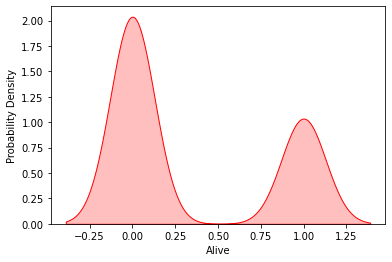

In [48]:
# Plotting the KDE Plot
sns.kdeplot(df.loc[(df['embarked']=='S'),'survived'], color='r', shade=True, Label='Emarbekment')
plt.xlabel('Alive')
plt.ylabel('Probability Density')
  

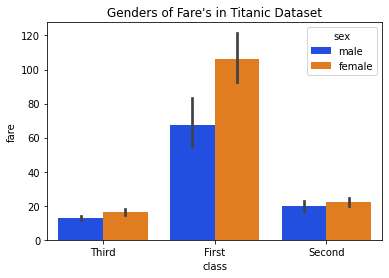

In [51]:
sns.barplot(x = 'class', y = 'fare',
            hue = 'sex', data = df, 
            palette='bright')
 
plt.title("Genders of Fare's in Titanic Dataset")
plt.show()

## How do we EDA with Pandas?

* data quality, structure, etc. metrics; $\rightarrow$ `.info()`
* descriptive stats for all single columns; $\rightarrow$ `.describe()`, `.mean()`, `.value_counts()`
* descriptive stats for all pairs of columns; $\rightarrow$ `.corr()`
* domain-specific row subsets; $\rightarrow$ `df.loc`
* introduce factoring columns; $\rightarrow$ `.groupby`
* introduce domain-specific novel columns; $\rightarrow$ `df['bmi'] = df['w'] / df['h'] ** 2`

    

The purpose of computing a correlation score (default: pearson) is to determine *possible* relationships, rather than accurately measure correlation.

Note the *sign* of the score, and it's rough magnitude. You should plot all columns and pairs *regardless*. 

## Exercise (20 min)

Perform an EDA of the titanic dataset with pandas, include:

* data quality, structure, etc. metrics
    * `.info()`, `.isna().sum()`, etc.
* descriptive stats for all single columns
    * `.describe()`, `.mean()`, `.median()`, `.std()`, `.value_counts()`
* descriptive stats for all pairs of columns
    * ie., `.corr()`